In [19]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size =0.2, random_state= 42)

In [20]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3 , activation= 'relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

In [21]:
model.add(keras.layers.Conv2D(64, kernel_size=3 , activation= 'relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [22]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 100)              

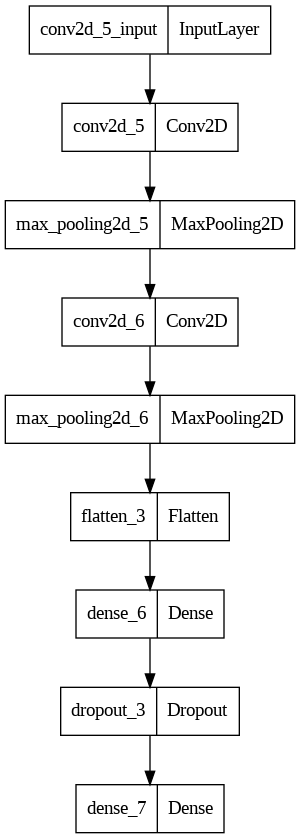

In [24]:
keras.utils.plot_model(model)

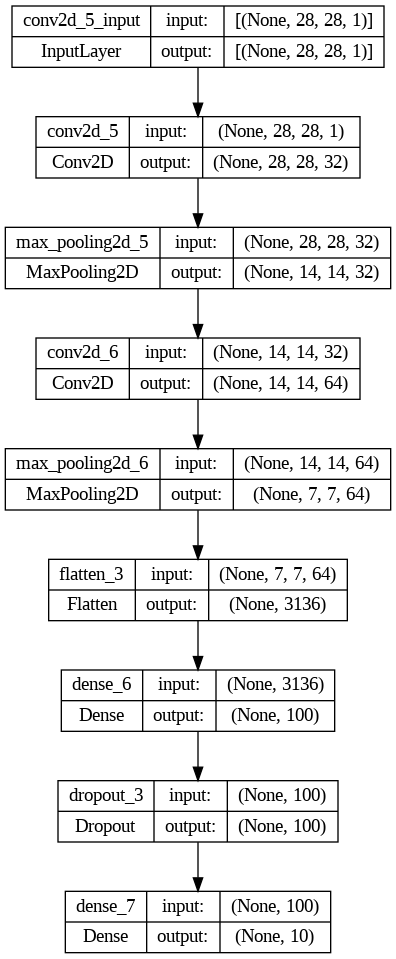

In [25]:
keras.utils.plot_model(model, show_shapes=True)

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb= keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, validation_data =(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 15s 4ms/step - loss: 0.5265 - accuracy: 0.8111 - val_loss: 0.3302 - val_accuracy: 0.8786
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3535 - accuracy: 0.8742 - val_loss: 0.2951 - val_accuracy: 0.8900
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3031 - accuracy: 0.8913 - val_loss: 0.2613 - val_accuracy: 0.9045
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2684 - accuracy: 0.9029 - val_loss: 0.2444 - val_accuracy: 0.9097
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2451 - accuracy: 0.9106 - val_loss: 0.2531 - val_accuracy: 0.9054
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2276 - accuracy: 0.9165 - val_loss: 0.2355 - val_accuracy: 0.9147
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2071 - accuracy: 0.9238 - val_loss: 0.2360 - val_accuracy

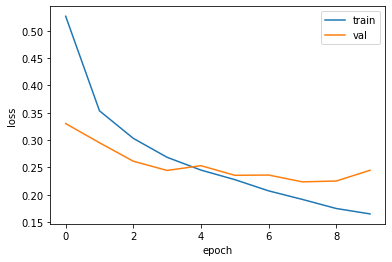

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [29]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2235 - accuracy: 0.9178


[0.22354282438755035, 0.9177500009536743]

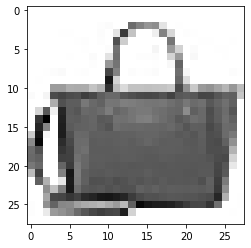

In [30]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [31]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 183ms/step
[[1.6971278e-17 6.8129519e-18 1.0652002e-17 7.4431427e-16 2.5290231e-16
  1.5224797e-17 1.5956372e-16 9.6255225e-14 1.0000000e+00 1.5703951e-17]]


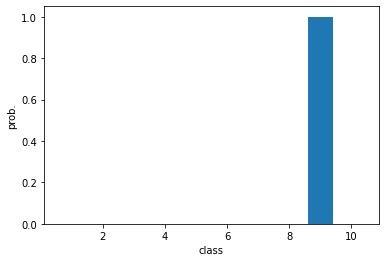

In [34]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [35]:
classes= ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈','가방', '앵클 부츠']

In [36]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [39]:
test_scaled = test_input.reshape(-1, 28, 28, 1) /255
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2405 - accuracy: 0.9154


[0.24047990143299103, 0.9154000282287598]